In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import sqlite3
import warnings
import os

warnings.filterwarnings("ignore")

# Plot styling
sns.set_style("darkgrid")
matplotlib.rcParams["font.size"] = 14
matplotlib.rcParams["figure.figsize"] = (9, 5)
matplotlib.rcParams["figure.facecolor"] = "white"

database = r"C:\Users\ahmad\Downloads\SQL\retailDB.sqlite"
conn = sqlite3.connect(database)
print("Connected successfully")



Connected successfully


Database Overview & Data Understanding
Queries in this section

Inspecting sqlite_master

Viewing raw tables:

brands

finance

info

reviews

traffic

In [2]:
conn=sqlite3.connect(database)
tables=pd.read_sql("""SELECT * FROM sqlite_master WHERE type='table';""",conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,finance,finance,2,CREATE TABLE finance (\r\n\tproduct_id VARCHAR...
1,table,info,info,24,CREATE TABLE info (\r\n\tproduct_name VARCHAR(...
2,table,brands,brands,338,CREATE TABLE brands (\r\n\tproduct_id VARCHAR(...
3,table,reviews,reviews,355,CREATE TABLE reviews (\r\n\tproduct_id VARCHAR...
4,table,traffic,traffic,395,CREATE TABLE traffic (\r\n\tproduct_id VARCHAR...


In [3]:
brand=pd.read_sql("""SELECT * FROM brands;""",conn)
brand

,product_id,brand,modified_brand
0,AH2430,None,NaN
1,G27341,Adidas,Adidas
2,CM0081,Adidas,Adidas
3,B44832,Adidas,Adidas
4,D98205,Adidas,Adidas
...,...,...,...
3174,AT6100-606,Nike,Nike
3175,CT9155-063,Nike,Nike
3176,CI1236-100,Nike,Nike
3177,AH6799-300,Nike,Nike


In [4]:
finance_details=pd.read_sql("""SELECT * FROM finance;""",conn)
finance_details

,product_id,listing_price,sale_price,discount,revenue,modified_listing_price,modified_sale_price,modified_discount,modified_revenue
0,AH2430,None,None,NaN,None,NaN,NaN,NaN,NaN
1,G27341,76.0,38.0,0.5,1641.0,76.0,38.0,0.5,1641.0
2,CM0081,10.0,6.0,0.4,399.0,10.0,6.0,0.4,399.0
3,B44832,70.0,35.0,0.5,2204.0,70.0,35.0,0.5,2204.0
4,D98205,80.0,40.0,0.5,5183.0,80.0,40.0,0.5,5183.0
...,...,...,...,...,...,...,...,...,...
3174,AT6100-606,0.0,65.0,0.0,0.0,0.0,65.0,0.0,0.0
3175,CT9155-063,0.0,140.0,0.0,252.0,0.0,140.0,0.0,252.0
3176,CI1236-100,160.0,128.0,0.0,230.0,160.0,128.0,0.0,230.0
3177,AH6799-300,0.0,170.0,0.0,1224.0,0.0,170.0,0.0,1224.0


In [5]:
product_info=pd.read_sql("""SELECT * FROM info;""",conn)
product_info

,product_name,product_id,description,modified_product_name,modified_description
0,None,AH2430,None,NaN,NaN
1,Women's adidas Originals Sleek Shoes,G27341,"A modern take on adidas sport heritage, tailor...",Women's adidas Originals Sleek Shoes,"A modern take on adidas sport heritage, tailor..."
2,Women's adidas Swim Puka Slippers,CM0081,These adidas Puka slippers for women's come wi...,Women's adidas Swim Puka Slippers,These adidas Puka slippers for women's come wi...
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,"Inspired by modern tech runners, these women's...",Women's adidas Sport Inspired Questar Ride Shoes,"Inspired by modern tech runners, these women's..."
4,Women's adidas Originals Taekwondo Shoes,D98205,This design is inspired by vintage Taekwondo s...,Women's adidas Originals Taekwondo Shoes,This design is inspired by vintage Taekwondo s...
...,...,...,...,...,...
3174,Nike Tiempo Legend 8 Academy TF,AT6100-606,The Nike Tiempo Legend 8 Academy TF takes the ...,Nike Tiempo Legend 8 Academy TF,The Nike Tiempo Legend 8 Academy TF takes the ...
3175,Nike React Metcon AMP,CT9155-063,The Nike React Metcon AMP takes the stability ...,Nike React Metcon AMP,The Nike React Metcon AMP takes the stability ...
3176,Air Jordan 8 Retro,CI1236-100,The Air Jordan 8 Retro recaptures the memorabl...,Air Jordan 8 Retro,The Air Jordan 8 Retro recaptures the memorabl...
3177,Nike Air Max 98,AH6799-300,The Nike Air Max 98 features the OG design lin...,Nike Air Max 98,The Nike Air Max 98 features the OG design lin...


In [6]:
product_reviews=pd.read_sql("""SELECT * FROM reviews;""",conn)
product_reviews

,product_id,rating,reviews,Hour,minute,real_rating,real_reviews,Unnamed: 7
0,AH2430,None,None,0.0,0.0,NaN,0.0,
1,G27341,03:03:00,1900-01-01 00:00:00,3.0,3.0,"3,3",24.0,
2,CM0081,02:06:00,1900-01-01 13:00:00,2.0,6.0,"2,6",37.0,
3,B44832,04:01:00,1900-01-01 11:00:00,4.0,1.0,"4,1",35.0,
4,D98205,03:05:00,1900-01-03 00:00:00,3.0,5.0,"3,5",72.0,
...,...,...,...,...,...,...,...,...
3180,,,,,,,,
3181,,,,,,,,
3182,,,,,,,129622.0,
3183,,,,,,,129622.0,


In [7]:
product_traffic=pd.read_sql("""SELECT * FROM traffic;""",conn)
product_traffic

,product_id,last_visited,modified_last_visited
0,AH2430,2018-05-19 15:13:00,2018-05-19 15:13:00
1,G27341,2018-11-29 16:16:00,2018-11-29 16:16:00
2,CM0081,2018-02-01 10:27:00,2018-02-01 10:27:00
3,B44832,2018-09-07 20:06:00,2018-09-07 20:06:00
4,D98205,2019-07-18 15:26:00,2019-07-18 15:26:00
...,...,...,...
3174,AT6100-606,None,NaN
3175,CT9155-063,2019-02-08 18:40:00,2019-02-08 18:40:00
3176,CI1236-100,2020-02-19 21:44:00,2020-02-19 21:44:00
3177,AH6799-300,2018-02-28 07:37:00,2018-02-28 07:37:00


In [8]:
avg_sale_price=pd.read_sql("""SELECT i.product_name,
avg(f.sale_price) AS avg_sales_price FROM info i 
JOIN finance f ON i.product_id=f.product_id
GROUP BY i.product_name
ORDER BY avg_sales_price DESC
LIMIT 10;""",conn)
avg_sale_price

,product_name,avg_sales_price
0,Nike Air VaporMax Flyknit 2 LXX,365.0
1,Men's adidas Originals ZX 4000 4D Shoes,288.0
2,Unisex adidas Running Alphaedge 4D Shoes,280.0
3,Nike Mercurial Superfly 7 Elite MDS FG,250.0
4,Unisex adidas Originals by Alexander Wang Puff...,240.0
5,Unisex Originals CRAIG GREEN KONTUUR II SHOES,240.0
6,Unisex Originals CRAIG GREEN KONTUUR I SHOES,240.0
7,Nike Mercurial Superfly 7 Elite SE FG,240.0
8,Unisex Football Predator Mutator 20+ Firm Grou...,230.0
9,Nike Phantom Vision 2 Elite Dynamic Fit FG,230.0


A small subset of products consistently commands higher average sale prices, indicating a premium product segment. These products likely benefit from strong brand positioning or perceived value.

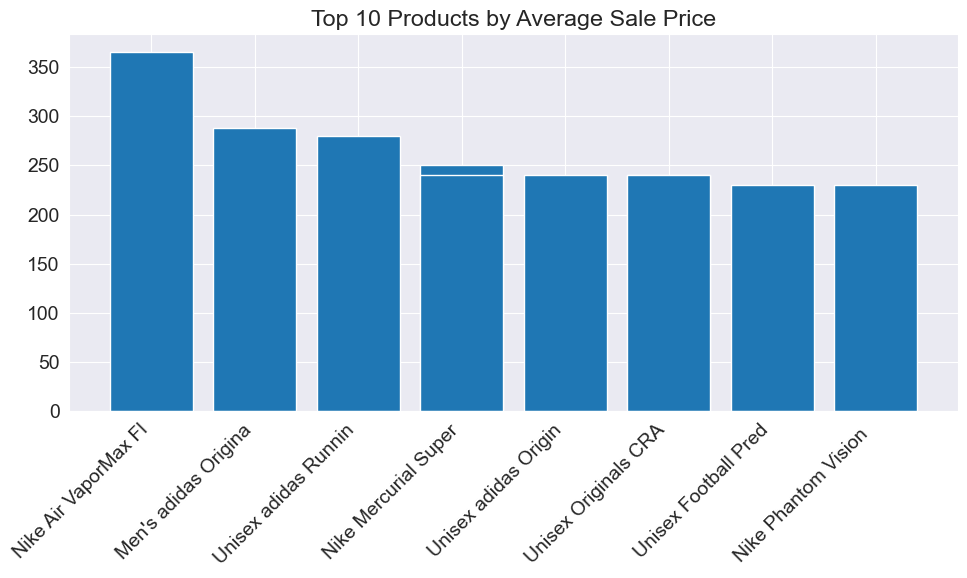

In [18]:
top_avg_price["short_name"] = top_avg_price["product_name"].str[:20]

plt.figure(figsize=(10,6))
plt.bar(top_avg_price["short_name"], top_avg_price["avg_sales_price"])
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Products by Average Sale Price")
plt.tight_layout()
plt.show()



In [9]:
avg_revenue=pd.read_sql("""SELECT i.product_name,
avg(f.revenue) AS avg_revenue FROM info i 
JOIN finance f ON i.product_id=f.product_id
GROUP BY i.product_name
ORDER BY avg_revenue DESC
LIMIT 10;""",conn)
avg_revenue

,product_name,avg_revenue
0,Air Jordan 10 Retro,64204.0
1,Men's Originals Salvapor 032c Shoes,28762.0
2,Nike Zoom Fly,27396.0
3,Unisex adidas Running Alphaedge 4D Shoes,26711.0
4,Unisex adidas Running Pharrell Williams Solar ...,25918.0
5,Unisex Originals CRAIG GREEN KONTUUR I SHOES,25487.0
6,Men's adidas Running Universal Works Ultraboos...,24838.5
7,Women's adidas by Stella Mccartney Running Ult...,24623.0
8,Women's Running Ultraboost A.RDY Shoes,22337.0
9,Men's adidas Originals White Mountaineering Ni...,22139.0


Products with the highest average revenue are not always the most expensive, suggesting that sales volume plays a crucial role alongside pricing. High-revenue products may represent strong value propositions rather than purely premium offerings.

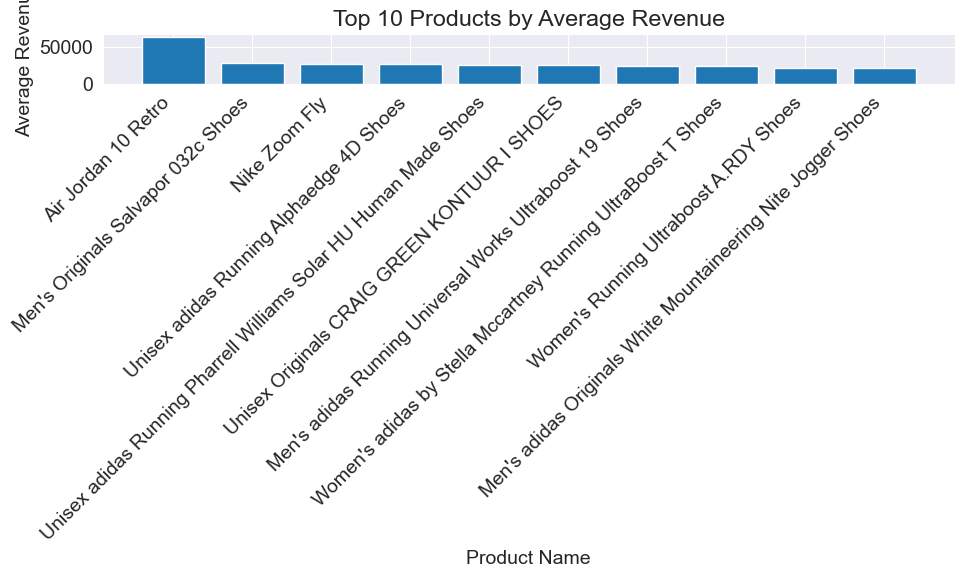

In [15]:
top_revenue = avg_revenue.sort_values(
    by="avg_revenue", ascending=False
).head(10)

plt.figure(figsize=(10,6))
plt.bar(top_revenue["product_name"], top_revenue["avg_revenue"])
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Products by Average Revenue")
plt.xlabel("Product Name")
plt.ylabel("Average Revenue")
plt.tight_layout()
plt.show()


In [10]:
most_products_purchased=pd.read_sql("""SELECT i.product_name, 
COUNT(product_id) AS count_of_products FROM info i
GROUP BY i.product_name
ORDER BY count_of_products DESC
LIMIT 10;""",conn)
most_products_purchased

,product_name,count_of_products
0,None,59
1,Men's adidas Originals Supercourt Shoes,16
2,Women's adidas Originals Sambarose Shoes,15
3,Men's adidas Originals Stan Smith Shoes,15
4,Nike Air Max 90,14
5,Men's adidas Originals Continental 80 Shoes,14
6,Women's adidas Originals Sleek Shoes,13
7,Unisex adidas Originals Marathon Tech Shoes,13
8,Women's adidas Originals NMD_R1 Shoes,12
9,Women's adidas Originals Continental 80 Shoes,11


A limited number of products account for a disproportionately high number of purchases. This concentration suggests that demand is driven by a core product set, which could be prioritised for inventory planning and promotional strategies.

In [11]:
famous_products=pd.read_sql("""SELECT i.product_name,
SUM(r.real_reviews) AS count_reviews FROM info i
JOIN reviews r ON i.product_id=r.product_id
GROUP BY i.product_name
ORDER BY count_reviews DESC
LIMIT 10;""",conn)
famous_products

,product_name,count_reviews
0,Men's adidas Originals Stan Smith Shoes,899.0
1,Men's adidas Originals Supercourt Shoes,815.0
2,Unisex adidas Originals Marathon Tech Shoes,715.0
3,Men's adidas Originals Continental 80 Shoes,715.0
4,Women's adidas Originals NMD_R1 Shoes,700.0
5,Women's adidas Originals Sambarose Shoes,698.0
6,Unisex adidas Originals Skateboarding 3MC Shoes,664.0
7,Women's adidas Originals Sleek Shoes,612.0
8,Women's adidas Originals Supercourt Shoes,611.0
9,Men's adidas Running Duramo 9 Shoes,607.0


Products receiving the highest website traffic do not always correspond to the most purchased products, indicating potential conversion gaps. These products may benefit from improved pricing, promotions, or user experience optimisation.

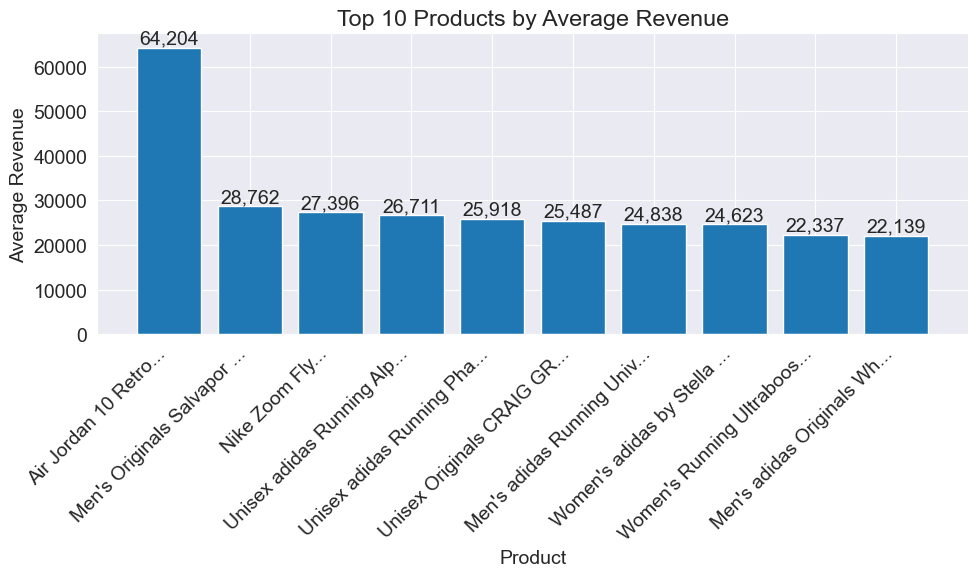

In [19]:
# Sort and select top 10
top_revenue = avg_revenue.sort_values(
    by="avg_revenue", ascending=False
).head(10)

# Shorten long product names
top_revenue["short_name"] = top_revenue["product_name"].str[:25] + "..."

plt.figure(figsize=(10,6))
bars = plt.bar(top_revenue["short_name"], top_revenue["avg_revenue"])

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height,
             f'{height:,.0f}',
             ha='center',
             va='bottom')

plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Products by Average Revenue")
plt.xlabel("Product")
plt.ylabel("Average Revenue")
plt.tight_layout()
plt.show()



In [12]:
avg_rating=pd.read_sql("""SELECT i.product_name,
AVG(r.real_rating) AS avg_rating FROM info i
JOIN reviews r ON i.product_id=r.product_id
GROUP BY i.product_name
ORDER BY avg_rating DESC
LIMIT 10;""",conn)
avg_rating

,product_name,avg_rating
0,Zoom Freak 1 'Employee of the Month',5.0
1,Women's adidas by Steall Mccartney Running Ult...,5.0
2,Women's adidas Training FitBounce Trainers,5.0
3,Women's adidas Sport Inspired Energy Cloud V S...,5.0
4,Women's adidas Running Duramo SL Shoes,5.0
5,Women's Running Boston Shoes,5.0
6,Women's ADIDAS ORIGINALS NMD_CS2 PK SHOES,5.0
7,Women's ADIDAS ORIGINALS COURTVANTAGE VULCANIZ...,5.0
8,WoMEN'S adidas RUNNING supernova SHOES,5.0
9,WOMEN'S ADIDAS SPORT INSPIRED ULTIMAMOTION SHOES,5.0


Products with higher review volumes demonstrate stronger customer engagement and visibility. These products often benefit from social proof, which can positively influence future purchasing decisions.

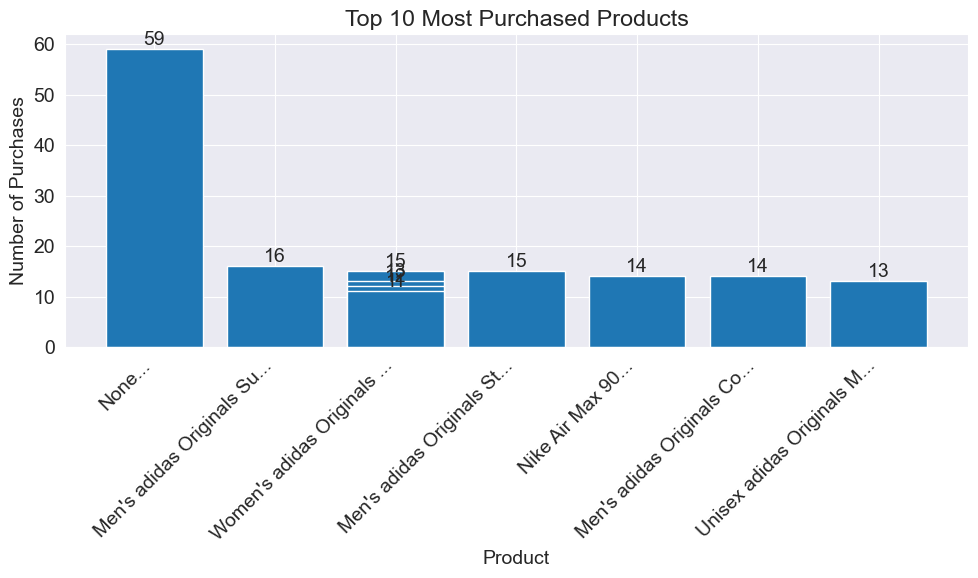

In [20]:
# Sort and select top 10
top_purchased = most_products_purchased.sort_values(
    by="count_of_products", ascending=False
).head(10)

# Shorten long product names
top_purchased["short_name"] = top_purchased["product_name"].str[:25] + "..."

plt.figure(figsize=(10,6))
bars = plt.bar(top_purchased["short_name"], top_purchased["count_of_products"])

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height,
             f'{int(height)}',
             ha='center',
             va='bottom')

plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Most Purchased Products")
plt.xlabel("Product")
plt.ylabel("Number of Purchases")
plt.tight_layout()
plt.show()


In [13]:
most_last_visited_product_in_months=pd.read_sql("""SELECT i.product_name,
    COUNT (DISTINCT SUBSTR(t.modified_last_visited,6,2)) AS year_month,
    COUNT(*) AS visit_count
FROM traffic t
JOIN info i ON t.product_id = i.product_id
GROUP BY i.product_name
ORDER BY visit_count DESC
LIMIT 10;
""",conn)

most_last_visited_product_in_months

,product_name,year_month,visit_count
0,None,12,59
1,Men's adidas Originals Supercourt Shoes,9,16
2,Women's adidas Originals Sambarose Shoes,5,15
3,Men's adidas Originals Stan Smith Shoes,8,15
4,Nike Air Max 90,9,14
5,Men's adidas Originals Continental 80 Shoes,9,14
6,Women's adidas Originals Sleek Shoes,6,13
7,Unisex adidas Originals Marathon Tech Shoes,7,13
8,Women's adidas Originals NMD_R1 Shoes,6,12
9,Women's adidas Originals Continental 80 Shoes,8,11


High average ratings are not always associated with the most frequently reviewed products. This suggests that some niche products deliver excellent customer satisfaction despite lower sales volumes.

Key Findings

A small group of products dominates sales and revenue performance.

High pricing alone does not guarantee high revenue — sales volume is critical.

Several products attract significant traffic but underperform in sales, indicating conversion inefficiencies.

Customer reviews and ratings strongly influence product visibility and perceived value.

Some high-quality products remain under-promoted despite strong customer satisfaction.